## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df= pd.merge(mouse_metadata,study_results, on ='Mouse ID', how='outer')

# Display the data table for preview
print(df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [36]:
# Checking the number of mice.
mice_count = len(df["Mouse ID"].unique())
mice_count

249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_df=df.duplicated(subset=['Mouse ID','Timepoint'])
df['Duplicated']=duplicate_df.values
mouse_ID = (df.loc[df['Duplicated']==True,'Mouse ID']).unique()
print('The Mouse ID with duplicated timepoint is '+ mouse_ID)
index_value = df[df['Mouse ID']==mouse_ID[0]].index

['The Mouse ID with duplicated timepoint is g989']


In [38]:
# Optional: Get all the data for the duplicate mouse ID. 



In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

df_clean = df.drop(index=df.index[index_value])
df_clean.shape
df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [40]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(df_clean['Mouse ID'].unique())
print(f"The number of mice in the clean DataFrame is {mice_count}")

The number of mice in the clean DataFrame is 248


## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary dataframe.

df_drug = df_clean.groupby('Drug Regimen')
mean_by_drug = round(df_drug['Tumor Volume (mm3)'].mean(),2)
median_by_drug = round(df_drug['Tumor Volume (mm3)'].median(),2)
var_by_drug = round(df_drug['Tumor Volume (mm3)'].var(),2)
std_by_drug = round(df_drug['Tumor Volume (mm3)'].std(),2)
sem_by_drug = round(df_drug['Tumor Volume (mm3)'].sem(),2)
table_stats = pd.merge(mean_by_drug,median_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)_x':'Mean','Tumor Volume (mm3)_y':'Median'})
table_stats = pd.merge(table_stats,var_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)':'Variance'})
table_stats = pd.merge(table_stats,std_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
table_stats = pd.merge(table_stats,sem_by_drug, on='Drug Regimen')
table_stats=table_stats.rename(columns={'Tumor Volume (mm3)':'Standard Error of the Mean'})

print(table_stats)


               Mean  Median  Variance  Standard Deviation  \
Drug Regimen                                                
Capomulin     40.68   41.56     24.95                4.99   
Ceftamin      52.59   51.78     39.29                6.27   
Infubinol     52.88   51.82     43.13                6.57   
Ketapril      55.24   53.70     68.55                8.28   
Naftisol      54.33   52.51     66.17                8.13   
Placebo       54.03   52.29     61.17                7.82   
Propriva      52.32   50.45     43.85                6.62   
Ramicane      40.22   40.67     23.49                4.85   
Stelasyn      54.23   52.43     59.45                7.71   
Zoniferol     53.24   51.82     48.53                6.97   

              Standard Error of the Mean  
Drug Regimen                              
Capomulin                           0.33  
Ceftamin                            0.47  
Infubinol                           0.49  
Ketapril                            0.60  
Naftisol 

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stats = round(df_drug.agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']}),2)
stats = stats.rename(columns={'mean':'Mean','median':'Median','var':'Variance','std':'Standard Deviation','sem':'Standard Error of the Mean'})
print(stats)


             Tumor Volume (mm3)                                     \
                           Mean Median Variance Standard Deviation   
Drug Regimen                                                         
Capomulin                 40.68  41.56    24.95               4.99   
Ceftamin                  52.59  51.78    39.29               6.27   
Infubinol                 52.88  51.82    43.13               6.57   
Ketapril                  55.24  53.70    68.55               8.28   
Naftisol                  54.33  52.51    66.17               8.13   
Placebo                   54.03  52.29    61.17               7.82   
Propriva                  52.32  50.45    43.85               6.62   
Ramicane                  40.22  40.67    23.49               4.85   
Stelasyn                  54.23  52.43    59.45               7.71   
Zoniferol                 53.24  51.82    48.53               6.97   

                                         
             Standard Error of the Mean  
Drug 

## Bar and Pie Charts

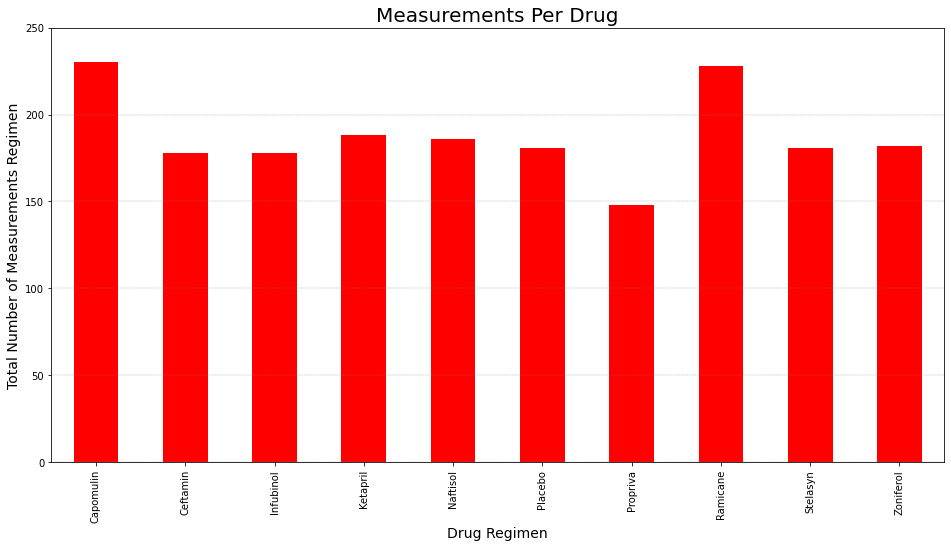

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_by_drug = df_drug['Tumor Volume (mm3)'].count()
plot1 = count_by_drug.plot(kind='bar',color = 'r', figsize=(16,8))
plot1.set_xlabel('Drug Regimen',fontsize=14)
plot1.set_ylabel('Total Number of Measurements Regimen',fontsize=14)
plot1.set_title('Measurements Per Drug',fontsize=20)
plot1.set_ylim(0,250)
plot1.yaxis.grid(True, color='grey', linestyle='--', linewidth=0.3)
plt.show()

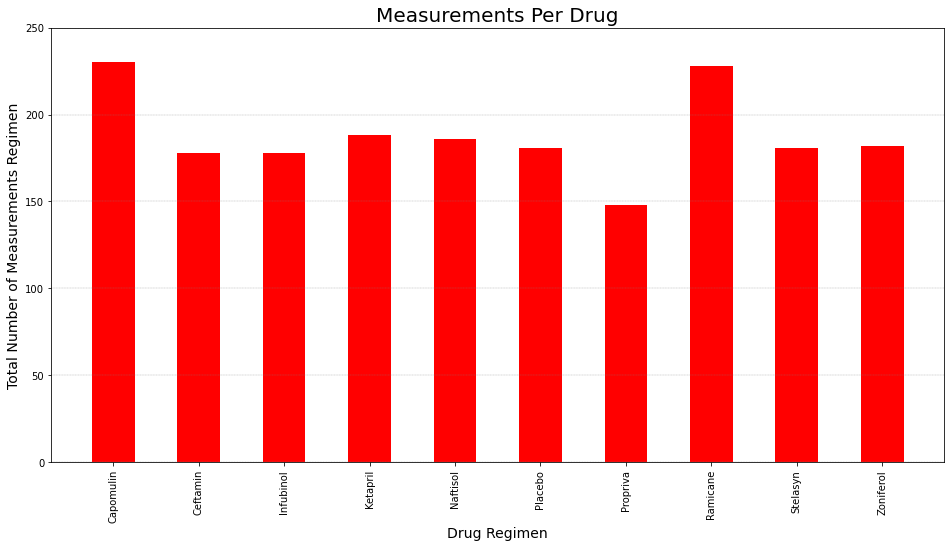

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
axis_x = count_by_drug.index
axis_y = count_by_drug.values
plt.subplots(figsize=(16, 8))
plt.bar(axis_x, axis_y, width=0.5, color='r', align="center")
plt.xlabel('Drug Regimen',fontsize=14)
plt.ylabel('Total Number of Measurements Regimen',fontsize=14)
plt.xticks(rotation=90)
plt.title('Measurements Per Drug',fontsize=20)
plt.ylim(0,250)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

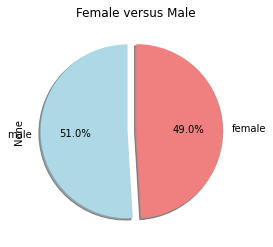

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male = len(df_clean.loc[df_clean['Sex']=='Male'])
female = len(df_clean.loc[df_clean['Sex']=='Female'])
explode = (0.1,0)
pie_sex = pd.Series([male,female])
colors = ["lightblue","lightcoral"]
pie_labels = ['male','female']
pie_plot=pie_sex.plot(kind='pie',y = pie_sex.values, title = 'Female versus Male', explode = explode, colors=colors,startangle=90, labels = pie_labels, shadow = True, autopct="%1.1f%%")
plt.show()

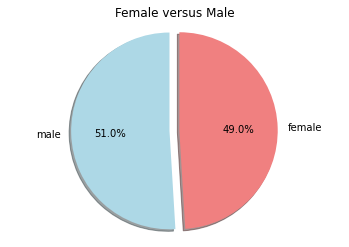

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_clean['Sex'].unique()
male = len(df_clean.loc[df_clean['Sex']=='Male'])
female = len(df_clean.loc[df_clean['Sex']=='Female'])
pie_sex = [male,female]
explode = (0.1,0)
plt.pie(pie_sex, explode = explode, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title('Female versus Male')
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Locate the rows which contain mice on each drug and get the tumor volumes

# Start by getting the last (greatest) timepoint for each mouse
df_mouse = df_clean.groupby('Mouse ID')
max_timepoint = df_mouse['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_clean1 = pd.merge(df_clean,max_timepoint, on= 'Mouse ID', how = 'outer')

# Rename columns
df_clean1 = df_clean1.rename(columns={'Timepoint_x' : "Timepoint", 'Timepoint_y' : "Max Timepoint"})
# Gets the final volume from the row where the timepoint equals to the max timepoint
df_final_volume = df_clean1.loc[df_clean1['Timepoint']==df_clean1['Max Timepoint'],:]
df_final_volume= df_final_volume.drop(['Sex', 'Age_months', 'Weight (g)','Timepoint','Metastatic Sites',
                                                     'Duplicated','Max Timepoint'],axis = 1)
df_final_volume = df_final_volume.sort_index()
capomulin = round(df_final_volume.loc[df_final_volume['Drug Regimen']=='Capomulin'],2)
ramicane = round(df_final_volume.loc[df_final_volume['Drug Regimen']=='Ramicane'],2)
infubinol = round(df_final_volume.loc[df_final_volume['Drug Regimen']=='Infubinol'],2)
ceftamin = round(df_final_volume.loc[df_final_volume['Drug Regimen']=='Ceftamin'],2)

# Print results
print(capomulin)
print()
print(ramicane)
print()
print(infubinol)
print()
print(ceftamin)



     Mouse ID Drug Regimen  Tumor Volume (mm3)
19       s185    Capomulin               23.34
29       x401    Capomulin               28.48
39       m601    Capomulin               28.43
64       f966    Capomulin               30.49
104      u364    Capomulin               31.02
124      y793    Capomulin               31.90
134      r554    Capomulin               32.38
144      m957    Capomulin               33.33
164      t565    Capomulin               34.46
204      i738    Capomulin               37.31
224      w914    Capomulin               36.04
244      g288    Capomulin               37.07
282      l897    Capomulin               38.85
299      b742    Capomulin               38.94
309      b128    Capomulin               38.98
317      j246    Capomulin               38.75
337      j119    Capomulin               38.13
340      w150    Capomulin               39.95
350      v923    Capomulin               40.66
360      g316    Capomulin               40.16
370      s710

In [66]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
volume_list = []

# Create empty dataframe to store data correspondent to the four drug regimen
drugs_df = pd.DataFrame()

# Declares types for drug_list and list_drug
drug_list = []
list_drug = []

for treatment in treatments:
    drugs_df = drugs_df.append(df_final_volume.loc[df_final_volume['Drug Regimen']==treatment])

drugs_df = drugs_df.sort_values(by='Tumor Volume (mm3)')

#adds volume series of drugs_df to a volume list and adds drug series of drugs_df to a drug list
volume_list = drugs_df['Tumor Volume (mm3)'].values.tolist()
drug_list = drugs_df['Drug Regimen'].values.tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    for i in range(len(drug_list)):
        if drug_list[i] == treatment:
            list_drug.append(volume_list[i])

    quartiles =  (drugs_df.loc[drugs_df['Drug Regimen']==treatment]).quantile([0.25, 0.5, 0.75]) 
    globals()['lowerq_'+ treatment] = quartiles.loc[quartiles.index==0.25]
    globals()['lowerq_'+ treatment] = globals()['lowerq_'+ treatment].values
    globals()['upperq_'+ treatment] = quartiles.loc[quartiles.index==0.75]
    globals()['upperq_'+ treatment] = globals()['upperq_'+ treatment].values
    globals()['iqr_'+ treatment] = globals()['upperq_'+ treatment] -globals()['lowerq_'+ treatment]

    # Determine outliers using upper and lower bounds
    globals()['lowerbound'+ treatment] =  globals()['lowerq_'+ treatment] - (1.5*globals()['iqr_'+ treatment])
    globals()['upperbound'+ treatment] = globals()['upperq_'+ treatment] + (1.5*globals()['iqr_'+ treatment])
    globals()['counter_'+ treatment] = 0
    globals()['outlier_'+ treatment]=[]
    for j in range(len((drugs_df.loc[drugs_df['Drug Regimen']==treatment]))):
        if list_drug[j] > globals()['upperbound'+ treatment] or list_drug[j] < globals()['lowerbound'+ treatment]:
            globals()['counter_'+ treatment] = globals()['counter_'+ treatment] + 1
            globals()['outlier_'+ treatment].append(list_drug[j])
    if  globals()['outlier_'+ treatment]==[]:
        print(treatment + ' treatment has no outlier volume')
    else:
        print(treatment + ' treatment has ' + str(globals()['counter_'+ treatment]) + ' outlier volume(s), which is/are ')
        print(*globals()['outlier_'+ treatment],sep=",")
    list_drug = []


Capomulin treatment has no outlier volume
Ramicane treatment has no outlier volume
Infubinol treatment has 1 outlier volume(s), which is/are 
36.321345799999996
Ceftamin treatment has no outlier volume


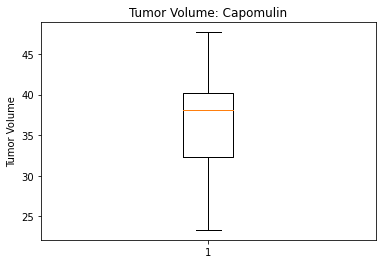

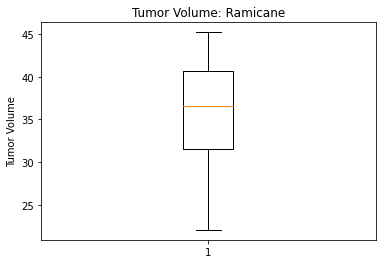

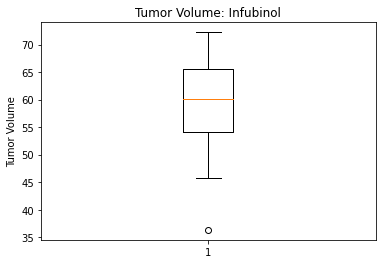

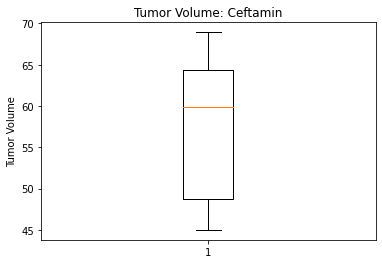

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volume=[]
for treatment in treatments:
    for i in range(len(drug_list)):
        if drug_list[i] == treatment:
            volume.append(volume_list[i])
    fig1, ax1 = plt.subplots()
    ax1.set_title('Tumor Volume: ' + str(treatment))
    ax1.set_ylabel('Tumor Volume')
    ax1.boxplot(volume)
    plt.show()
    volume=[]
        

## Line and Scatter Plots

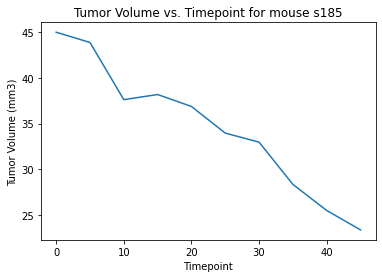

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

volume=[]
timepoint=[]
drug_df = df_clean.loc[df_clean['Drug Regimen']=='Capomulin']
volume_list = drug_df['Tumor Volume (mm3)'].values.tolist()
timepoint_list = drug_df['Timepoint'].values.tolist()
mouse_list = drug_df['Mouse ID'].values.tolist()
weight_list = drug_df['Weight (g)'].values.tolist()


mouse = mouse_list[0]
i = 0
while mouse_list[i] == mouse:
    volume.append(volume_list[i])
    timepoint.append(timepoint_list[i])
    i = i + 1
    
plt.plot(timepoint, volume)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for mouse '+ mouse)
plt.show()


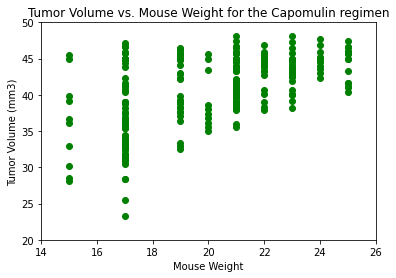

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weight_list, volume_list,  color = 'green')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight for the Capomulin regimen')
plt.xlim(14,26)
plt.ylim(20,50)
plt.show()

## Correlation and Regression

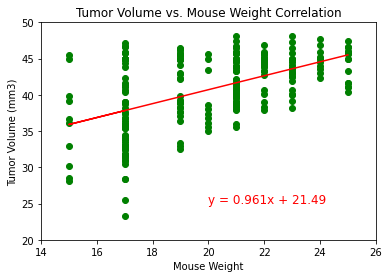

The r-squared is: 0.2764


In [61]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
regress_values=[]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_list,volume_list)
regress_values = np.asarray(weight_list) * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(weight_list, volume_list,  color = 'green')
plt.plot(weight_list,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=12,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight Correlation')
plt.xlim(14,26)
plt.ylim(20,50)
plt.show()
print(f"The r-squared is: {round(rvalue**2,4)}")
